[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving twitter_training.csv to twitter_training (1).csv
✅ Data Loaded. Preview:
    tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


/tmp/ipython-input-1954847002.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='pastel')


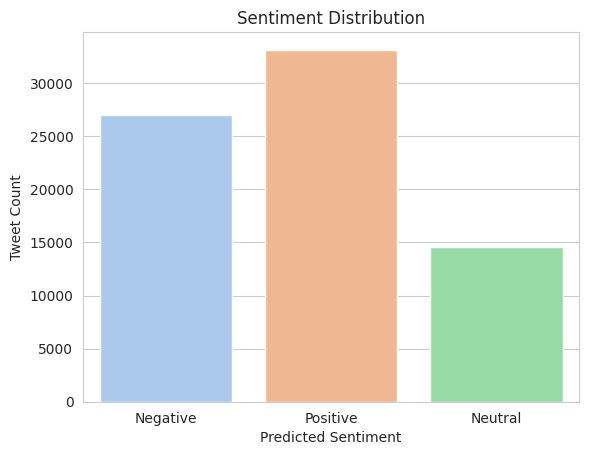

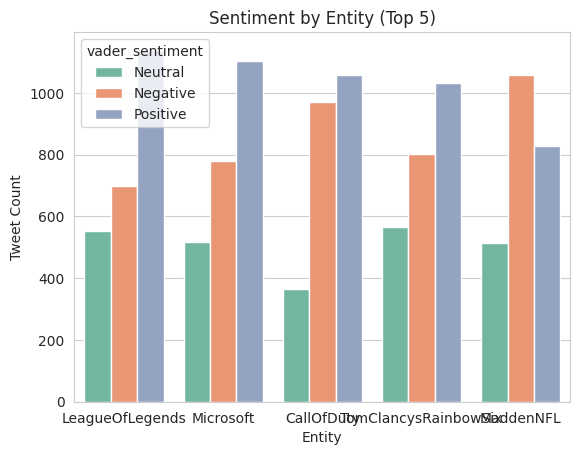

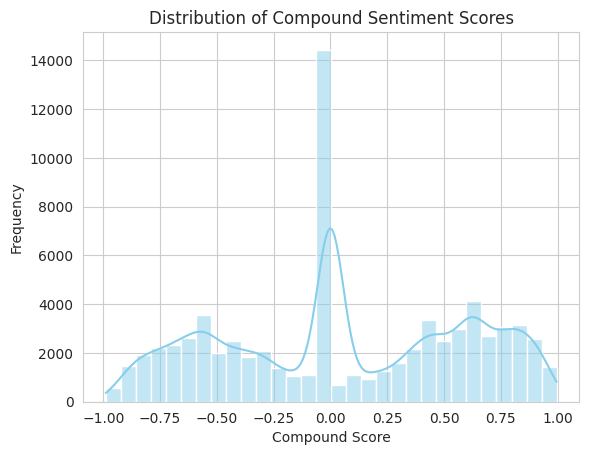


📄 Sample Classified Tweets:

                                                 content vader_sentiment
56163  @Ubisoft @Ubisoft_UK @UbisoftSupport @Rainbow6...        Negative
21964        bhopping in this csgo is so completely cozy         Neutral
14206                  Feeling a good man - Witch Doctor        Positive
69456  Yaaaas! . . I want to see Keanu animated in an...        Positive
30311                    A rubber is the real rubber QSS         Neutral


In [10]:
# Task 4: Sentiment Analysis on Twitter Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os

# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# 🔹 Step 1: Load Dataset (upload or from 'data/' folder)
try:
    df = pd.read_csv('data/twitter_training.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'content'])
except FileNotFoundError:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)), header=None, names=['tweet_id', 'entity', 'sentiment', 'content'])

print("✅ Data Loaded. Preview:\n", df.head())

# 🔹 Step 2: Preprocess Data
df['content'] = df['content'].astype(str)  # Ensure all content is string
df.dropna(subset=['content'], inplace=True)

# 🔹 Step 3: Sentiment Scoring with VADER
analyzer = SentimentIntensityAnalyzer()
df['compound_score'] = df['content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# 🔹 Step 4: Map compound scores to categories
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['compound_score'].apply(classify_sentiment)

# 🔹 Step 5: Save cleaned CSV
os.makedirs("charts", exist_ok=True)
df.to_csv("charts/twitter_cleaned.csv", index=False)

# 🔹 Step 6: Plotting

# Plot 1: Sentiment Distribution
sns.countplot(x='vader_sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Tweet Count")
plt.savefig("charts/sentiment_distribution.png")
plt.show()

# Plot 2: Entity vs Sentiment (Top 5 entities)
top_entities = df['entity'].value_counts().head(5).index
subset = df[df['entity'].isin(top_entities)]

sns.countplot(x='entity', hue='vader_sentiment', data=subset, palette='Set2')
plt.title("Sentiment by Entity (Top 5)")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.savefig("charts/sentiment_by_entity.png")
plt.show()

# Plot 3: Histogram of Compound Scores
sns.histplot(df['compound_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.savefig("charts/compound_score_distribution.png")
plt.show()

# 🔹 Step 7: Display few classified tweets
print("\n📄 Sample Classified Tweets:\n")
print(df[['content', 'vader_sentiment']].sample(5))
